In [110]:
#importing required libraries

import pandas as pd
# importing pandas library for importing and numerical operations

import numpy as np
# numpy library for data manipulation and analysis

import matplotlib.pyplot as plt
# importing matplotlib.pyplot library for creating data visualizations such as plots and charts.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [111]:
data = pd.read_csv(r'C:\Users\Student\Documents\3_Fall 2023\Machine Learning\HW3\brca_fpkm_gdc_bari_nonormalization.csv')
# Loading the brca_fpkm_gdc_bari_nonormalization csv data to the data variable using pandas.

In [112]:
data

,Barcode,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,GUCA1ANB,HERC3.1,SMIM42,DUS4L-BCAP29,C8orf44-SGK3,NPBWR1,PDCD6-AHRR,ACTL10,PANO1,label
0,TCGA-3C-AAAU-01A,2.5997,0.0245,28.0941,2.5028,1.0286,1.3283,2.0679,7.2405,3.3357,...,0.0000,0,0.0,1.5228,0.0000,0.7273,0.0000,0,0.3882,LumA
1,TCGA-3C-AALI-01A,2.5597,0.0376,41.8377,9.8346,2.2798,3.1867,6.1088,14.3510,5.2247,...,0.0122,0,0.0,1.0051,0.0000,0.0198,0.0000,0,0.7440,Her2
2,TCGA-3C-AALJ-01A,13.1981,1.6187,48.7619,2.5366,1.8393,5.0401,5.5963,12.4875,3.6519,...,0.0000,0,0.0,0.7459,0.0155,0.0000,0.0000,0,0.7384,LumB
3,TCGA-3C-AALK-01A,12.8083,0.0530,22.4704,3.7386,1.5078,2.2218,6.5522,10.6094,3.2970,...,0.0000,0,0.0,0.8266,0.0000,0.0000,0.0033,0,0.6290,LumA
4,TCGA-4H-AAAK-01A,12.1947,0.2186,25.6404,3.1496,1.3185,2.2639,8.5326,12.5900,3.6635,...,0.0000,0,0.0,0.5208,0.0000,0.0000,0.0000,0,0.4609,LumA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,TCGA-WT-AB44-01A,5.4684,0.5633,17.7092,3.8705,0.7080,4.4252,2.9825,19.5928,3.0310,...,0.0000,0,0.0,0.5148,0.0000,0.0165,0.0000,0,0.7630,LumA
1001,TCGA-XX-A899-01A,9.2601,0.2740,26.6070,4.2926,1.3448,7.7138,11.3306,12.5267,4.7074,...,0.0000,0,0.0,0.8681,0.0136,0.1778,0.0000,0,0.4334,LumA
1002,TCGA-XX-A89A-01A,8.7338,15.3096,22.2972,3.1576,1.5348,5.5952,12.2559,14.5091,4.4737,...,0.0000,0,0.0,1.9245,0.0000,0.0158,0.0000,0,0.3952,LumA
1003,TCGA-Z7-A8R5-01A,16.0095,0.2117,27.1060,3.2761,0.5946,8.2715,6.9826,17.5916,2.4485,...,0.0000,0,0.0,0.5939,0.0000,0.0000,0.0000,0,0.5071,LumA


In [114]:
# Sample a smaller subset of your data (you can adjust the sample size)
size = 1000
sd = data.sample(n=size, random_state=42)

In [116]:
# Preprocess your data
X = sd.drop(['label', 'Barcode'], axis=1)  # Assuming 'label' is the target column
y = sd['label']

In [117]:
X

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C3,GUCA1ANB,HERC3.1,SMIM42,DUS4L-BCAP29,C8orf44-SGK3,NPBWR1,PDCD6-AHRR,ACTL10,PANO1
926,3.9243,0.1412,30.8770,3.2524,1.4524,8.5421,9.7845,8.9520,3.5505,14.4610,...,0.3431,0.0,0,0.0000,0.3958,0.0000,0.0693,0.0,0,0.2233
630,13.1367,0.0292,24.8719,2.8461,2.5269,8.1564,7.7750,24.9492,6.0616,20.3068,...,2.4832,0.0,0,0.0000,0.5812,0.0000,0.0256,0.0,0,0.2822
682,13.0670,0.0430,26.1841,3.5715,1.1592,3.5179,12.0388,8.7155,4.7899,15.2197,...,0.0784,0.0,0,0.0000,0.7076,0.0086,0.0060,0.0,0,0.2343
514,23.9509,0.3933,28.8393,3.1487,1.2461,7.3172,7.6275,18.4680,13.7340,10.9617,...,0.5309,0.0,0,0.0000,0.5502,0.0000,0.0562,0.0,0,0.2816
365,10.2890,0.1875,43.7124,4.1102,2.1051,3.9206,7.1805,9.1323,3.7806,14.6579,...,0.2278,0.0,0,0.0273,0.7770,0.0093,0.0263,0.0,0,0.1812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,13.7210,0.0557,24.9989,5.2653,3.8148,2.4359,22.2934,13.8971,4.8712,13.5267,...,154.4868,0.0,0,0.0162,1.2217,0.0166,0.4415,0.0,0,0.1077
614,10.2599,1.1850,25.1002,3.1023,0.8407,3.4717,8.2467,8.5745,3.1854,9.0311,...,0.0939,0.0,0,0.0000,0.9605,0.0256,0.0145,0.0,0,0.2806
20,16.8110,0.0667,14.1843,1.8555,0.8471,2.1994,3.4080,46.5259,2.0893,18.2483,...,0.2025,0.0,0,0.0000,0.5496,0.0133,0.0140,0.0,0,0.6794
700,1.9503,0.0149,20.8942,3.9517,0.9731,0.7938,1.4671,12.6018,9.9818,11.1158,...,0.2264,0.0,0,0.0000,0.5480,0.0000,0.0000,0.0,0,0.2489


In [118]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
val = min(X_train.shape[0], X_train.shape[1])

In [120]:
# Initialize hyperparameter options
multi_class_options = ['ovr', 'multinomial']
penalties_options = ['l1', 'l2', 'elasticnet']
l1_ratios = []

In [138]:
# Store results for each combination
results = {}

#logistic regression code
for multi_class_option in multi_class_options:
    for penalty in penalties_options:
        if penalty == 'elasticnet':
            l1_ratios = [0.5]
        else:
            l1_ratios = [None]

        for l1_ratio in l1_ratios:
            pca = PCA(n_components=val)
            X_train1 = pca.fit_transform(X_train)
            X_test1 = pca.transform(X_test)

            LR = LogisticRegression(multi_class=multi_class_option, penalty=penalty,  l1_ratio=l1_ratio, solver='saga', max_iter=1000, random_state=42)
            
            LR.fit(X_train1, y_train)

            # Make predictions on the test set
            y_pred = LR.predict(X_test1)

            # Calculate accuracy 
            accuracy = accuracy_score(y_test, y_pred)
            
            # Store the result of all the accuracies
            key = f'{multi_class_option}_{penalty}'
            results[key] = accuracy

C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

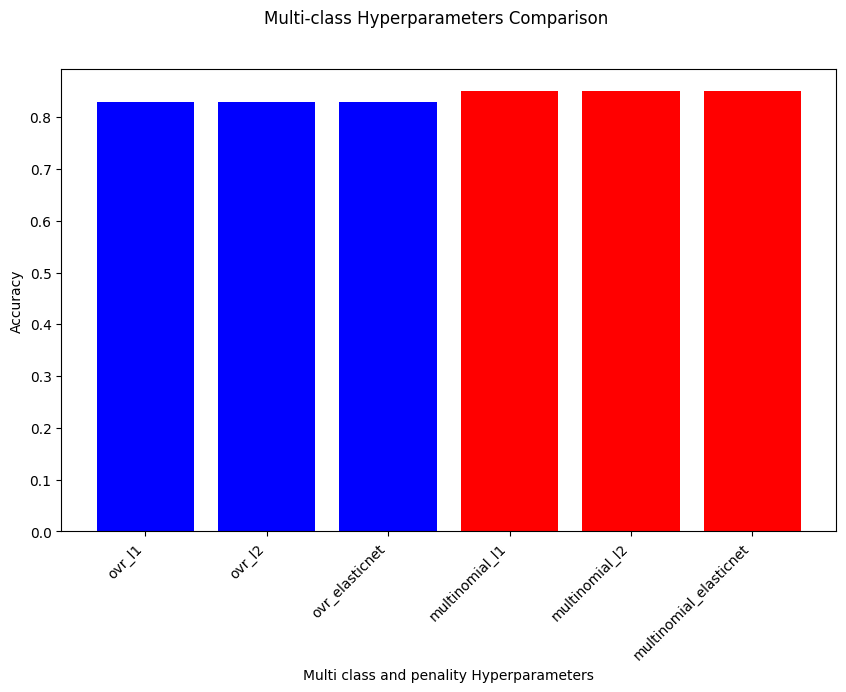

In [139]:
# Create a bar plot to compare the results with specified colors
plt.figure(figsize=(10, 6))

# Create a list of colors for the bars
colors = ['blue', 'blue', 'blue', 'red', 'red', 'red']  
plt.suptitle("Multi-class Hyperparameters Comparison")
bars = plt.bar(results.keys(), results.values(), color=colors)

plt.xlabel("Multi class and penality Hyperparameters")
plt.ylabel("Accuracy")

plt.xticks(rotation=45, ha="right")
plt.show()

In [205]:
# Iterate through the results dictionary and print each combination
for combination, accuracy in results.items():
    multi_class, penalty = combination.split('_')
    print(f"Combination: Multi-class: {multi_class}, Penalty: {penalty}")
    print(f"Accuracy: {accuracy:.2f}")
    print()


Combination: Multi-class: ovr, Penalty: l1
Accuracy: 0.83

Combination: Multi-class: ovr, Penalty: l2
Accuracy: 0.83

Combination: Multi-class: ovr, Penalty: elasticnet
Accuracy: 0.83

Combination: Multi-class: multinomial, Penalty: l1
Accuracy: 0.85

Combination: Multi-class: multinomial, Penalty: l2
Accuracy: 0.85

Combination: Multi-class: multinomial, Penalty: elasticnet
Accuracy: 0.85



In [179]:
#best-performing L1 ratio for elastic penalty using "OVR"
l1_ratios_ovr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_accuracy_ovr = 0
best_l1_ratio_ovr = None

results_ovr = {}  # Store accuracy results for each L1 ratio

for l1_ratio in l1_ratios_ovr:
    pca = PCA(n_components=val)
    X_train1 = pca.fit_transform(X_train)
    X_test1 = pca.transform(X_test)

    LR = LogisticRegression(multi_class='ovr', penalty='elasticnet', l1_ratio=l1_ratio, solver='saga', max_iter=1000, random_state=42)

    LR.fit(X_train1, y_train)

    # Make predictions on the test set
    y_pred = LR.predict(X_test1)

    # Calculate accuracy 
    accuracy = accuracy_score(y_test, y_pred)

    results_ovr[l1_ratio] = accuracy

    if accuracy > best_accuracy_ovr:
        best_accuracy_ovr = accuracy
        best_l1_ratio_ovr = l1_ratio


C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best L1 ratio for OVR: 0.1
Best accuracy for OVR: 0.83


C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [197]:
print(f"Best L1 ratio for OVR: {best_l1_ratio_ovr}")
print(f"Best accuracy for OVR: {best_accuracy_ovr}")

Best L1 ratio for OVR: 0.1
Best accuracy for OVR: 0.83


In [202]:
# Print each combination of L1 ratio and accuracy
for key, accuracy in results_ovr.items():
    print(f"Combination: {key}, Accuracy: {accuracy}")

Combination: 0.1, Accuracy: 0.83
Combination: 0.2, Accuracy: 0.83
Combination: 0.3, Accuracy: 0.83
Combination: 0.4, Accuracy: 0.83
Combination: 0.5, Accuracy: 0.83
Combination: 0.6, Accuracy: 0.83
Combination: 0.7, Accuracy: 0.83
Combination: 0.8, Accuracy: 0.83
Combination: 0.9, Accuracy: 0.83


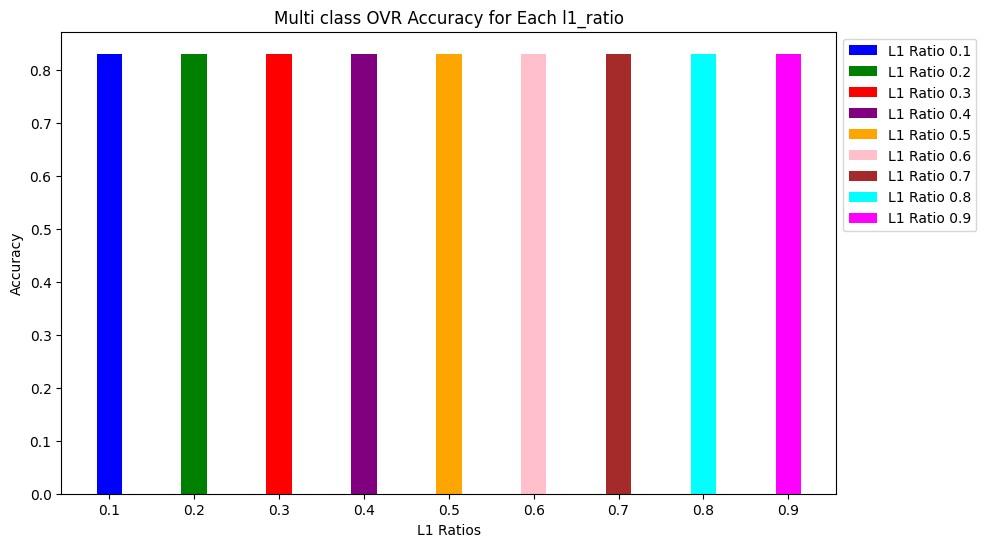

In [198]:
# Define a list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta']

# Define L1 ratios and corresponding positions
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
positions = range(len(l1_ratios))

# Plot for "OVR" multi-class option with different colors
plt.figure(figsize=(10, 6))

# Set the width for each bar
bar_width = 0.3

for i, (l1_ratio, color) in enumerate(zip(l1_ratios, colors)):
    x_position = i  # Use a single position for each L1 ratio
    plt.bar(x_position, results_ovr[l1_ratio], width=bar_width, color=color, label=f'L1 Ratio {l1_ratio}')

plt.title("Multi class OVR Accuracy for Each l1_ratio")
plt.xlabel("L1 Ratios")
plt.ylabel("Accuracy")
plt.xticks(positions, l1_ratios)  # Set positions for each L1 ratio
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [147]:
#best-performing L1 ratio for elastic penalty using "multinomial"
l1_ratios_multinomial = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_accuracy_multinomial = 0
best_l1_ratio_multinomial = None

results_multinomial = {}  # Store accuracy results for each L1 ratio

for l1_ratio in l1_ratios_multinomial:
    pca = PCA(n_components=val)
    X_train1 = pca.fit_transform(X_train)
    X_test1 = pca.transform(X_test)

    LR = LogisticRegression(multi_class='multinomial', penalty='elasticnet', l1_ratio=l1_ratio, solver='saga', max_iter=1000, random_state=42)

    LR.fit(X_train1, y_train)

    # Make predictions on the test set
    y_pred = LR.predict(X_test1)

    # Calculate accuracy 
    accuracy = accuracy_score(y_test, y_pred)

    results_multinomial[l1_ratio] = accuracy

    if accuracy > best_accuracy_multinomial:
        best_accuracy_multinomial = accuracy
        best_l1_ratio_multinomial = l1_ratio


C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [148]:
print(f"Best L1 ratio for multinomial: {best_l1_ratio_multinomial}")
print(f"Best accuracy for multinomial: {best_accuracy_multinomial}")

Best L1 ratio for multinomial: 0.1
Best accuracy for multinomial: 0.85


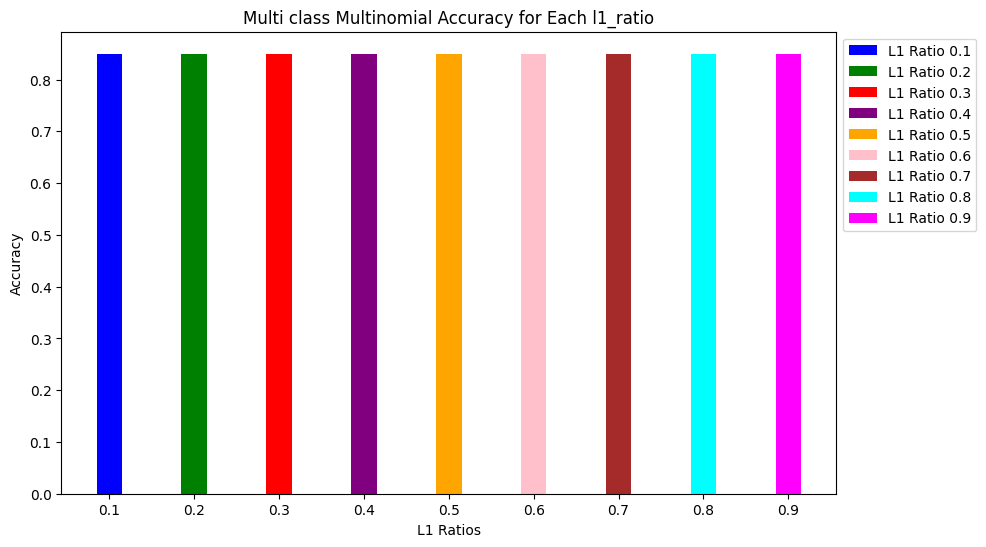

In [200]:
# Define a list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta']

# Define L1 ratios and corresponding positions
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
positions = range(len(l1_ratios))

# Plot for "OVR" multi-class option with different colors
plt.figure(figsize=(10, 6))

# Set the width for each bar
bar_width = 0.3

for i, (l1_ratio, color) in enumerate(zip(l1_ratios, colors)):
    x_position = i  # Use a single position for each L1 ratio
    plt.bar(x_position, results_multinomial[l1_ratio], width=bar_width, color=color, label=f'L1 Ratio {l1_ratio}')

plt.title("Multi class Multinomial Accuracy for Each l1_ratio")
plt.xlabel("L1 Ratios")
plt.ylabel("Accuracy")
plt.xticks(positions, l1_ratios)  # Set positions for each L1 ratio
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [203]:
# Print each combination of L1 ratio and accuracy
for key, accuracy in results_multinomial.items():
    print(f"Combination: {key}, Accuracy: {accuracy}")

Combination: 0.1, Accuracy: 0.85
Combination: 0.2, Accuracy: 0.85
Combination: 0.3, Accuracy: 0.85
Combination: 0.4, Accuracy: 0.85
Combination: 0.5, Accuracy: 0.85
Combination: 0.6, Accuracy: 0.85
Combination: 0.7, Accuracy: 0.85
Combination: 0.8, Accuracy: 0.85
Combination: 0.9, Accuracy: 0.85
